## 손글씨 분류

In [2]:
# 라이브러리 및 데이터
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
# 데이터 사이즈 확인
data = digits.data
target = digits.target
data.shape, digits.target.shape

((1797, 64), (1797,))

In [4]:
# 데이터 확인
data_df = pd.DataFrame(data=data, columns=digits.feature_names)
data_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


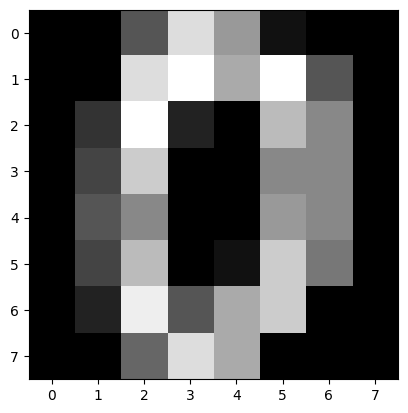

In [5]:
zero = data_df.iloc[0].values.reshape(8, 8)
plt.imshow(zero, cmap="gray")

In [6]:
pd.DataFrame(data=zero)

,0,1,2,3,4,5,6,7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0
1,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0
2,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0
3,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0
4,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0
5,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0
6,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0
7,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


3.684031635638865


3.1465324629263858

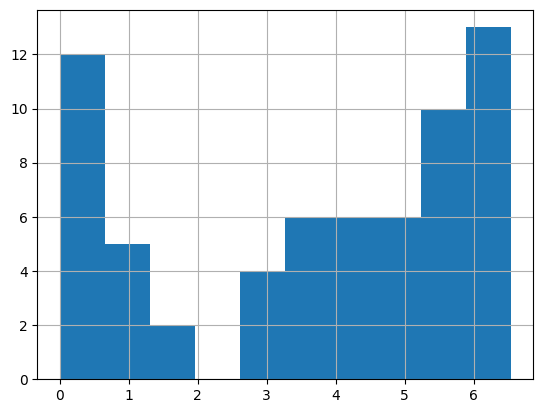

In [7]:
std_list = data_df.describe().loc["std"].reset_index(drop=True)
std_list.hist()
print(std_list.mean())
std_list[25]


In [8]:
# target 확인
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
# 데이터 분할 및 정규화
X_train, X_test, y_train, y_test = train_test_split(data_df, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [10]:
X_train, X_test = X_train / 255.0, X_test / 255.0
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

### 모델 학습

In [11]:
# training & evalucation function
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier

def train_eval(model, train_set, test_set):
    model.fit(*train_set)
    X_test, y_test = test_set
    y_pred = model.predict(X_test)
    print(f"Model <{model.__class__.__name__}>")
    print(classification_report(y_test, y_pred))
    
# DecisionTree
train_eval(DecisionTreeClassifier(), (X_train, y_train), (X_test, y_test))
# RandomForeset
train_eval(RandomForestClassifier(), (X_train, y_train), (X_test, y_test))
# LogisticRegressor
train_eval(LogisticRegression(), (X_train, y_train), (X_test, y_test))
# SVM
train_eval(svm.SVC(), (X_train, y_train), (X_test, y_test))
# SGDClassifier
train_eval(SGDClassifier(), (X_train, y_train), (X_test, y_test))

Model <DecisionTreeClassifier>
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.88      0.79      0.83        28
           2       0.87      0.79      0.83        33
           3       0.71      0.88      0.79        34
           4       0.77      0.89      0.83        46
           5       0.92      0.94      0.93        47
           6       0.94      0.91      0.93        35
           7       0.88      0.88      0.88        34
           8       0.78      0.70      0.74        30
           9       0.84      0.80      0.82        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.85      0.85       360

Model <RandomForestClassifier>
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2    

### 평가 지표 선택 기준
- 손 글씨 예측 모델의 평가기준은 precision과 recall 모두 고려할 필요가 있으므로 f1 score 지표 선택